In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keras is only to get boston housing data
# boston housing is also here: from sklearn.datasets import load_boston
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

/Users/biansiwei/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#read data
Changping_data_raw=pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
Changping_data = np.array(Changping_data_raw)

In [3]:
# Training set
data_pm25 = Changping_data[:,11:16] #input data
lable_pm25 = Changping_data[:,7] #output label

data_pm25 = np.array(data_pm25)
lable_pm25 = np.array(lable_pm25)

mean = data_pm25.mean(axis=0, dtype=float)
std = data_pm25.std(axis=0, dtype=float)

In [4]:
train_data = data_pm25[0:int(len(data_pm25)*0.8)]
train_label = lable_pm25[0:int(len(data_pm25)*0.8)]
test_data = data_pm25[int(len(data_pm25)*0.8):int(len(data_pm25))]
test_label = lable_pm25[int(len(data_pm25)*0.8):int(len(data_pm25))]

train_data = np.array(train_data, dtype= np.float32)
train_label = np.array(train_label, dtype= np.float32)
test_data = np.array(test_data, dtype= np.float32)
test_label = np.array(test_label, dtype= np.float32)

train_data = (train_data - mean) / std # (train_data - min) / (max-min) 
test_data = (test_data - mean) / std

order = np.argsort(np.random.random(train_label.shape))
train_data = train_data[order]
train_label = train_label[order]

print(train_data.shape,train_label.shape,test_data.shape,test_label.shape)

(1100, 5) (1100,) (275, 5) (275,)


In [5]:
# RFR parameters (random forest regression)
params_rfr = {'n_estimators':1000,
              'criterion':'mse', 
              #'ccp_alpha':0.001,
              'max_depth': 10,
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True,
              'max_features':None}

In [6]:
model = RandomForestRegressor(**params_rfr)

In [7]:
%%time
model.fit(train_data, train_label)

/Users/biansiwei/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


CPU times: user 1.74 s, sys: 14.8 ms, total: 1.76 s
Wall time: 1.77 s


RandomForestRegressor(criterion='mse', max_depth=10, max_features=None,
                      n_estimators=1000)

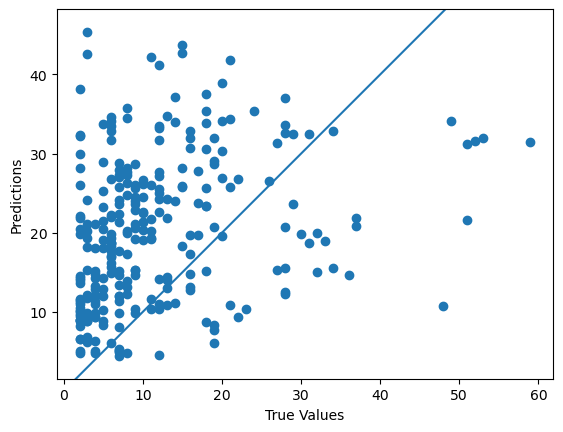

In [8]:
test_predictions = model.predict(test_data)

plt.scatter(test_label, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

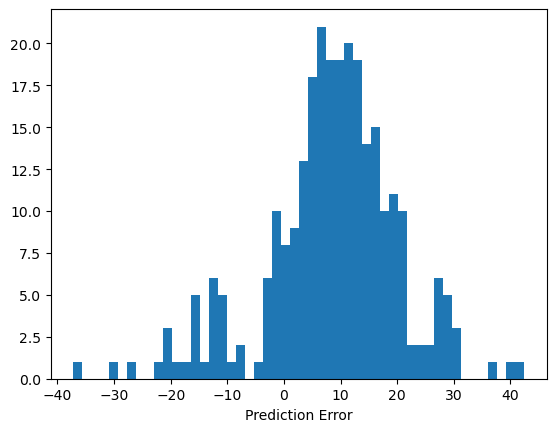

In [9]:
error = test_predictions - test_label
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()

In [10]:
mse = mean_squared_error(test_label, test_predictions)
print(f'the mse is {mse}')

the mse is 207.37754481796463


In [11]:
from sklearn.metrics import r2_score
r2_score(test_label,test_predictions)

-0.9199898842285474

In [12]:
y_test_pre = model.predict(test_data)

In [13]:
rmes=np.sqrt(np.mean((y_test_pre-test_label)**2))
rmes

14.400609182182698